In [1]:
import pandas as pd
import numpy as np
import requests
import time
import datetime

In [2]:
coin_id ='Chain Link'
#api = "https://api.coingecko.com/api/v3/coins/{}/market_chart/range?vs_currency={}&from={}&to={}".format(coin_id,currency,initial_date,final_date)
api='https://api.coingecko.com/api/v3/coins/chainlink/market_chart?vs_currency=inr&days=1'

In [3]:
import json
x=requests.get(api)
data = json.loads(x.text)


In [4]:
data['prices']
data_prices = []
for i in range(len(data['prices'])):
    data_prices.append(data['prices'][i][1])

In [5]:
df = pd.DataFrame(data_prices, columns =['price']) 

In [6]:
import matplotlib.pyplot as plt

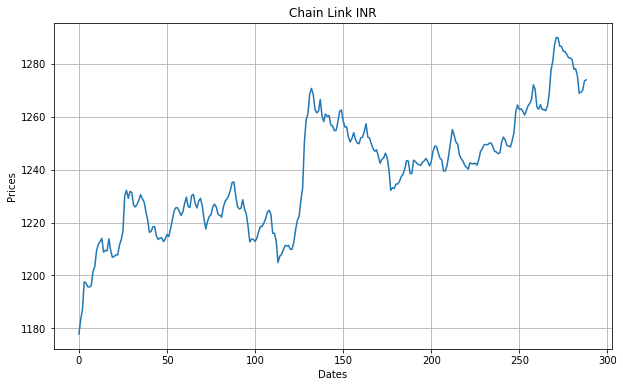

In [7]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['price'])
plt.title('{} INR'.format(coin_id))
plt.show()

Text(0.5, 1.0, 'Scatter plot of price')

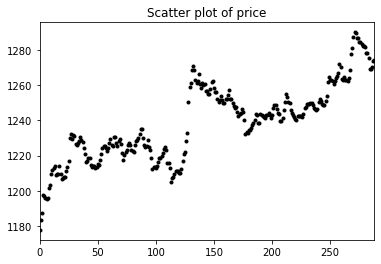

In [8]:
df['price'].plot(style='k.')
plt.title('Scatter plot of price')

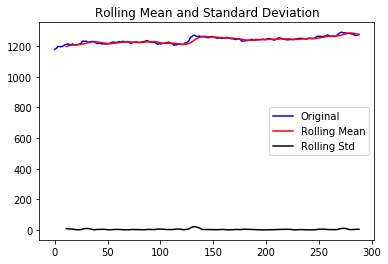

Results of dickey fuller test
Test Statistics                 -2.270896
p-value                          0.181527
No. of lags used                 1.000000
Number of observations used    287.000000
critical value (1%)             -3.453342
critical value (5%)             -2.871664
critical value (10%)            -2.572164
dtype: float64


In [9]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df['price'])

<Figure size 432x288 with 0 Axes>

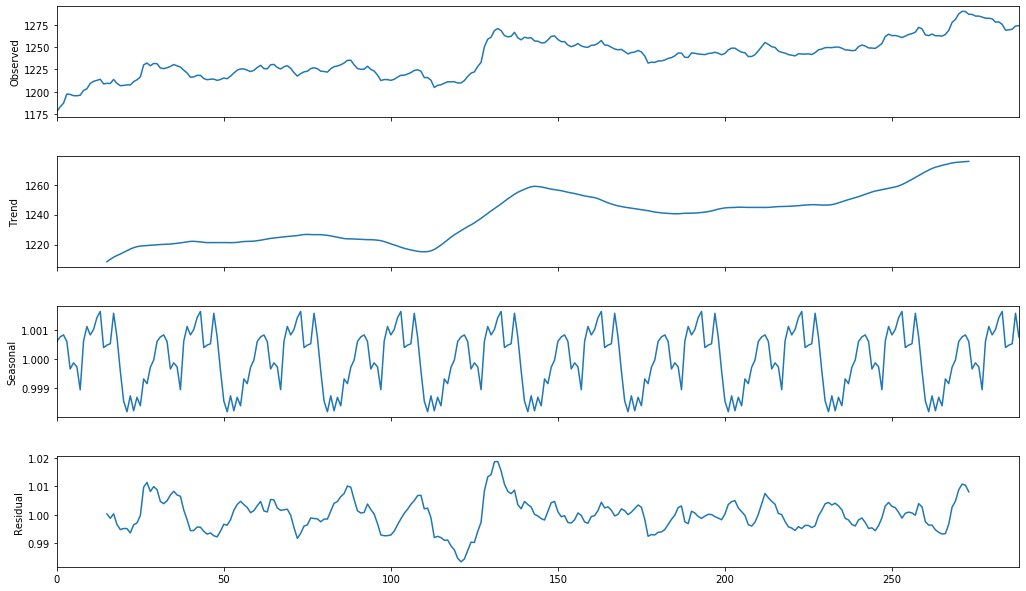

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['price'], model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


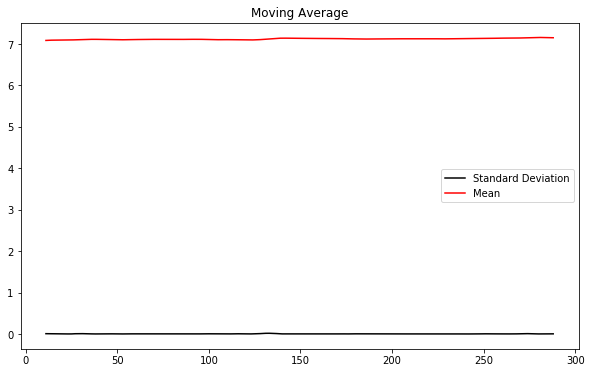

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df['price'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

29


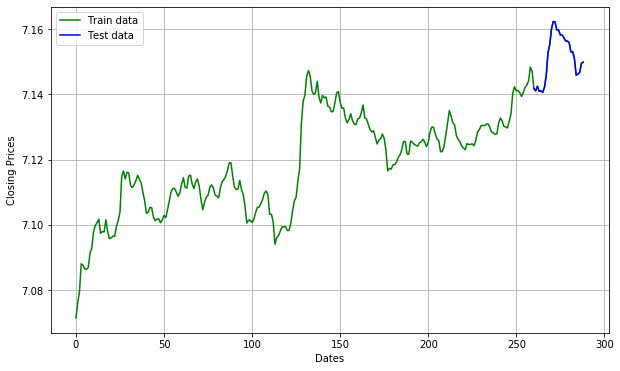

In [12]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
print(len(test_data))
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [13]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data, order=(3, 1, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                  256
Model:                 ARIMA(3, 1, 2)   Log Likelihood                1199.260
Method:                       css-mle   S.D. of innovations              0.002
Date:                Sun, 30 Aug 2020   AIC                          -2384.520
Time:                        20:06:43   BIC                          -2359.704
Sample:                             1   HQIC                         -2374.539
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.000      1.040      0.299      -0.000       0.001
ar.L1.D.price    -0.3469      2.651     -0.131      0.896      -5.542       4.848
ar.L2.D.price     0.3110      1.267     

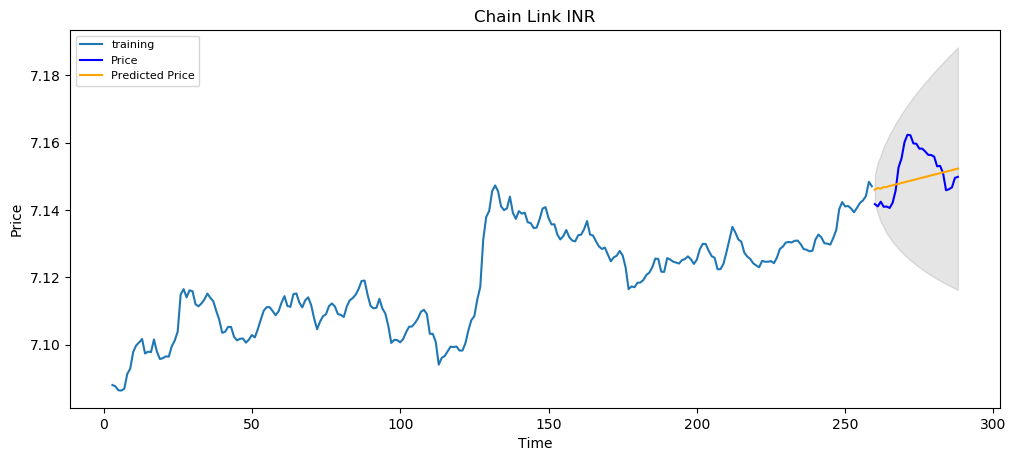

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
fc, se, conf = fitted.forecast(len(test_data), alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Price')
plt.plot(fc_series, color = 'orange',label='Predicted Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('{} INR'.format(coin_id))
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [15]:
import math
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 4.99986856080716e-05
MAE: 0.006212474003545042
RMSE: 0.0070709748697100885
MAPE: 0.0008684369332543413


In [16]:
api_data_set = "https://api.coingecko.com/api/v3/coins/chainlink/market_chart?vs_currency=inr&days=1"

In [17]:
data = requests.get(api_data_set)
data = json.loads(data.text)
data['prices'][0][1]

1177.8858968165384

In [18]:
data_dic= {'price':[],'market_cap':[],'rolling_mean':[],'Bull/Bear':[]}
rolling_sum =0
for i in range(len(data['market_caps'])):
    data_dic['market_cap'].append(data['market_caps'][i][1])
    data_dic['price'].append(data['prices'][i][1])
    rolling_sum+= data['prices'][i][1]
    data_dic['rolling_mean'].append(rolling_sum/(i+1))
    if(i==0):
        data_dic['Bull/Bear'].append(0)
    else:
        if(data['prices'][i-1][1] > data['prices'][i][1]):
            data_dic['Bull/Bear'].append(-1)
        else:
            data_dic['Bull/Bear'].append(1)
df1 = pd.DataFrame(data_dic)
rolstd = df1['price'].rolling(12).std()
data_dic['rolling_std'] = rolstd
pred_traj= list(fc_series)
confidence_level = (pred_traj[-1] - pred_traj[0])/len(pred_traj)
confidence_level*100


0.021463858431369394

In [19]:
df = pd.DataFrame(data_dic)

In [20]:
df.to_csv("data_set_chainLink.csv")